In [23]:
import os, warnings 
import pandas as pd
from konlpy.tag import Okt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

font_location = 'C:/Windows/Fonts/HYCYSM.TTF'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family=font_name)

    1. 긍/부정 수 Count 해보고
    2. 파일별로 Count된거 그려보고
    3. 그 뒤에 형태소 분석 나누고 (Okt.pos)
    4. 긍/부정에 따른 언급량 많은 키워드만 뽑자.

    일단 파일 1개에 대해서만 진행해보고,
    다 되면 함수짜서 일괄로 그래프 그려보자. 이게 나을듯?

In [3]:
url = 'UseData/Voucher/Cleaned/'
sampleFile = os.listdir(url)[0]
df = pd.read_csv(url + sampleFile, index_col=0)
df

,별점,Contents,긍부정
0,5,칼로리도 낮고 맛있어요 간식으로 최고,1
1,5,단호박죽 너무 맛있어요 실온보관이라 편리하고 들고다니기도 좋네요 추천합니다,1
2,5,칼로리도 낮고 단호박도 달고 맛있네요!! 간편포장이라서 편리합니다,1
3,5,단호박 달고 맛있어요 칼로리도 낮아서 부담없이 참 좋습니다~~ 차게 먹으니 더 ...,1
4,5,맛도먹을만하구 재구매의사있습니다,1
...,...,...,...
1429,5,다이어트하는데 간식으로먹으려고샀어요! 제입맛에는 카카오보단 검은콩 단백질함량도...,1
1430,5,맛있어용 아침 식사 대용으로 굿굿,1
1431,5,적당히 달고 맛있어요 ! 더 사려구요,1
1432,5,계속 재구매해서 먹어요.,1


In [5]:
type(df['긍부정'])

pandas.core.series.Series

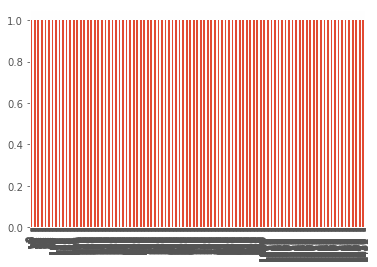

In [8]:
df['긍부정'].plot.bar(x=df['긍부정'])

In [18]:
df['별점'].value_counts(), df['긍부정'].value_counts()

(5    1236
 4     150
 3      39
 2       8
 1       1
 Name: 별점, dtype: int64, 1    1386
 0      48
 Name: 긍부정, dtype: int64)

Text(0.5, 1.0, '별점 별 빈도수')

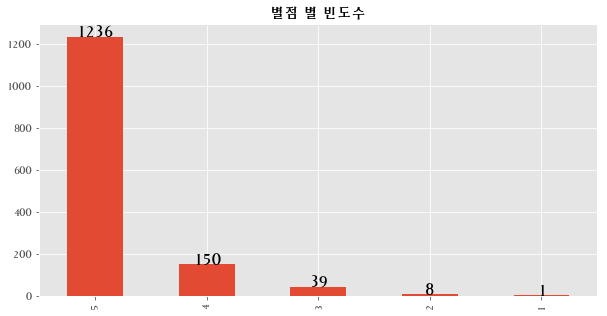

In [32]:
plt.figure(figsize=(10, 5))
df['별점'].value_counts().plot.bar()
for index, data in enumerate(df['별점'].value_counts()):
    plt.text(x=index, y=data, s=f'{data}', fontdict=dict(fontsize=15), ha='center')
plt.title('별점 별 빈도수')

Text(0.5, 0, '긍정:1, 부정:0')

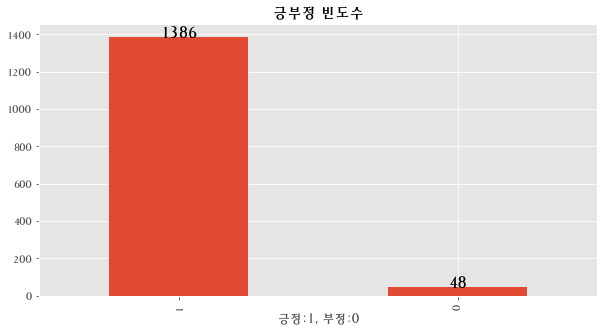

In [34]:
plt.figure(figsize=(10, 5))
df['긍부정'].value_counts().plot.bar()
for index, data in enumerate(df['긍부정'].value_counts()):
    plt.text(x=index, y=data, s=f'{data}', fontdict=dict(fontsize=15), ha='center')
plt.title('긍부정 빈도수')
plt.xlabel('긍정:1, 부정:0')

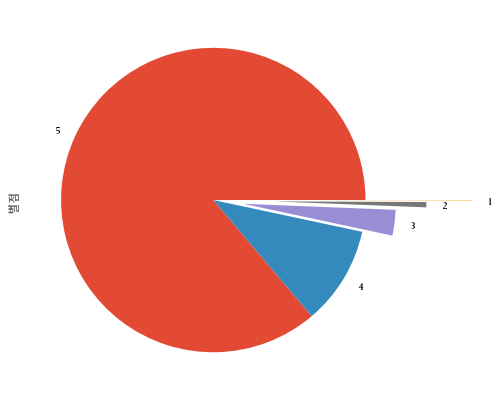

In [41]:
explode = (0, 0, 0.2, 0.4, 0.7)
df['별점'].value_counts().plot.pie(figsize=(7,7), explode=explode)

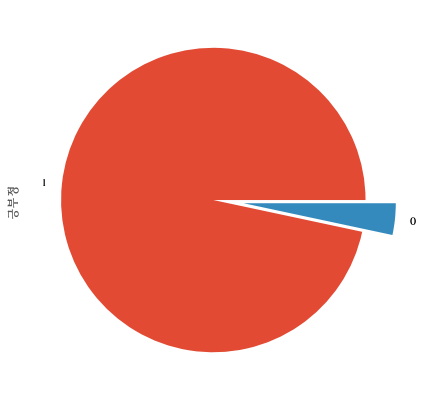

In [42]:
df['긍부정'].value_counts().plot.pie(figsize=(7,7), explode=(0, 0.2))

In [47]:
len(df.loc[df['별점']==3])

39

In [52]:
okt = Okt()
# df['Contents_morphs'] = df['Contents'].apply(lambda x: okt.morphs(x))
df['Contents_morphs'] = df['Contents']
# df['Contents_morphs']

In [54]:
df.loc[df['별점']==1]['Contents_morphs']

81    [그동안, 잘, 보내주셨는데, 이번, 은, 상자, 뚜껑, 이, 터져있네요, !?]
Name: Contents_morphs, dtype: object

    불용어 사전을 만들어서 걸러내는게 맞을까...

In [55]:
df

,별점,Contents,긍부정,Contents_morphs
0,5,칼로리도 낮고 맛있어요 간식으로 최고,1,"[칼로리, 도, 낮고, 맛있어요, 간식, 으로, 최고]"
1,5,단호박죽 너무 맛있어요 실온보관이라 편리하고 들고다니기도 좋네요 추천합니다,1,"[단, 호박죽, 너무, 맛있어요, 실온, 보관, 이라, 편리하고, 들고다니, 기도,..."
2,5,칼로리도 낮고 단호박도 달고 맛있네요!! 간편포장이라서 편리합니다,1,"[칼로리, 도, 낮고, 단호박, 도, 달, 고, 맛있네요, !!, 간편, 포장, 이..."
3,5,단호박 달고 맛있어요 칼로리도 낮아서 부담없이 참 좋습니다~~ 차게 먹으니 더 ...,1,"[단호박, 달, 고, 맛있어요, 칼로리, 도, 낮아서, 부담, 없이, 참, 좋습니다..."
4,5,맛도먹을만하구 재구매의사있습니다,1,"[맛, 도, 먹을만, 하구, 재구매, 의사, 있습니다]"
...,...,...,...,...
1429,5,다이어트하는데 간식으로먹으려고샀어요! 제입맛에는 카카오보단 검은콩 단백질함량도...,1,"[다이어트, 하는데, 간식, 으로, 먹으려고, 샀어요, !, 제, 입맛, 에는, 카..."
1430,5,맛있어용 아침 식사 대용으로 굿굿,1,"[맛있어용, 아침, 식사, 대용, 으로, 굿굿]"
1431,5,적당히 달고 맛있어요 ! 더 사려구요,1,"[적당히, 달, 고, 맛있어요, !, 더, 사려구요]"
1432,5,계속 재구매해서 먹어요.,1,"[계속, 재구매, 해서, 먹어요, .]"


    긍/부정에서 빈도수대로 먼저 뽑은 다음에
    거기서 필요없어 보이는걸 제거하는 방식으로 진행하자.

In [56]:
df_pos = df.loc[df['긍부정']==1]
df_neg = df.loc[df['긍부정']==0]
df_pos

,별점,Contents,긍부정,Contents_morphs
0,5,칼로리도 낮고 맛있어요 간식으로 최고,1,"[칼로리, 도, 낮고, 맛있어요, 간식, 으로, 최고]"
1,5,단호박죽 너무 맛있어요 실온보관이라 편리하고 들고다니기도 좋네요 추천합니다,1,"[단, 호박죽, 너무, 맛있어요, 실온, 보관, 이라, 편리하고, 들고다니, 기도,..."
2,5,칼로리도 낮고 단호박도 달고 맛있네요!! 간편포장이라서 편리합니다,1,"[칼로리, 도, 낮고, 단호박, 도, 달, 고, 맛있네요, !!, 간편, 포장, 이..."
3,5,단호박 달고 맛있어요 칼로리도 낮아서 부담없이 참 좋습니다~~ 차게 먹으니 더 ...,1,"[단호박, 달, 고, 맛있어요, 칼로리, 도, 낮아서, 부담, 없이, 참, 좋습니다..."
4,5,맛도먹을만하구 재구매의사있습니다,1,"[맛, 도, 먹을만, 하구, 재구매, 의사, 있습니다]"
...,...,...,...,...
1429,5,다이어트하는데 간식으로먹으려고샀어요! 제입맛에는 카카오보단 검은콩 단백질함량도...,1,"[다이어트, 하는데, 간식, 으로, 먹으려고, 샀어요, !, 제, 입맛, 에는, 카..."
1430,5,맛있어용 아침 식사 대용으로 굿굿,1,"[맛있어용, 아침, 식사, 대용, 으로, 굿굿]"
1431,5,적당히 달고 맛있어요 ! 더 사려구요,1,"[적당히, 달, 고, 맛있어요, !, 더, 사려구요]"
1432,5,계속 재구매해서 먹어요.,1,"[계속, 재구매, 해서, 먹어요, .]"


In [57]:
df_neg

,별점,Contents,긍부정,Contents_morphs
13,3,끈기가 없어서 배가 부르지 않아요. 성분은 좋은거 같은데 입에 안맞네요~,0,"[끈기, 가, 없어서, 배, 가, 부르지, 않아요, ., 성분, 은, 좋은, 거, ..."
72,3,많이 판매 하서오.,0,"[많이, 판매, 하서, 오, .]"
81,1,그동안 잘 보내주셨는데 이번은 상자 뚜껑이 터져있네요 !?,0,"[그동안, 잘, 보내주셨는데, 이번, 은, 상자, 뚜껑, 이, 터져있네요, !?]"
102,2,엄마 출근하실 때 가방에 하나둘씩 넣어드리면 좋아하시고 저도 맛있게 먹어서 ...,0,"[엄마, 출근, 하실, 때, 가방, 에, 하나, 둘, 씩, 넣어, 드리면, 좋아하시..."
116,3,맛있습니다 !!!!!,0,"[맛있습니다, !!!!!]"
122,3,어 정말 맛있어요 최고,0,"[어, 정말, 맛있어요, 최고]"
243,3,후기에 맛있다고 해서 샀는데 단백질 비릿한 느낌은 좀 있어요,0,"[후기, 에, 맛있다고, 해서, 샀는데, 단백질, 비릿, 한, 느낌, 은, 좀, 있어요]"
294,2,저한테는 좀 달아요,0,"[저, 한, 테, 는, 좀, 달아요]"
312,3,"맛있고 포장도 잘 되었어요,",0,"[맛있고, 포장, 도, 잘, 되었어요, ,]"
317,3,너무 달아요. 좀 덜 달았으면.,0,"[너무, 달아요, ., 좀, 덜, 달았으면, .]"


In [59]:
from collections import Counter
# 부정 먼저 해보자
for words in df['Contents_morphs']:
    wordList = Counter(words)
wordList

Counter({'계속': 1, '재구매': 1, '해서': 1, '먹고': 1, '있': 1, 'ㅇㅓ': 1, '요': 1})

In [62]:
[item for sublist in df['Contents_morphs'] for item in sublist]

['칼로리',
 '도',
 '낮고',
 '맛있어요',
 '간식',
 '으로',
 '최고',
 '단',
 '호박죽',
 '너무',
 '맛있어요',
 '실온',
 '보관',
 '이라',
 '편리하고',
 '들고다니',
 '기도',
 '좋네요',
 '추천',
 '합니다',
 '칼로리',
 '도',
 '낮고',
 '단호박',
 '도',
 '달',
 '고',
 '맛있네요',
 '!!',
 '간편',
 '포장',
 '이라서',
 '편리합니다',
 '단호박',
 '달',
 '고',
 '맛있어요',
 '칼로리',
 '도',
 '낮아서',
 '부담',
 '없이',
 '참',
 '좋습니다',
 '~~',
 '차게',
 '먹으니',
 '더',
 '맛있네요',
 '맛',
 '도',
 '먹을만',
 '하구',
 '재구매',
 '의사',
 '있습니다',
 '너무',
 '달',
 '지',
 '않고',
 '맛있어요',
 '맛있어요',
 '에너지',
 '든',
 '든',
 '배송',
 '도',
 '빠르고',
 '저렴해서',
 '과자',
 '는',
 '여기',
 '서',
 '만',
 '사',
 '요',
 '가격',
 '도',
 '저렴하고',
 '다이어트',
 '용',
 '으로',
 '딱입니다',
 '배송',
 '빠르고',
 '상품',
 '좋고',
 '가격',
 '좋',
 '아유',
 '착한',
 '가격',
 '에',
 '빠른',
 '배송',
 '괜찮네요',
 '저렴히',
 '잘',
 '샀어요',
 '좋아요',
 '끈기',
 '가',
 '없어서',
 '배',
 '가',
 '부르지',
 '않아요',
 '.',
 '성분',
 '은',
 '좋은',
 '거',
 '같은데',
 '입',
 '에',
 '안',
 '맞네요',
 '~',
 '메이플',
 '시럽',
 '넣으니',
 '먹을만',
 '하다고',
 '하시네요',
 '!',
 '맛있어요',
 '건강한',
 '맛',
 '포장',
 '깔',
 '끔',
 '숟가락',
 '도',
 '들어있어서',
 '좋어요',
 '좋습니다',
 '재구매',
 '의사',
 

In [63]:
from collections import Counter
from itertools import chain

countSeries = pd.Series(Counter(chain(*df['Contents_morphs']))).sort_index().rename_axis('word').reset_index(name='frequency')
countSeries

,word,frequency
0,!,139
1,!!,53
2,!!!,18
3,!!!!,4
4,!!!!!,1
...,...,...
3308,힘들고,1
3309,힘들어,1
3310,힘들었는데,2
3311,힘들었을거에요,1


    stem을 해서 힘들고/힘들어/힘들었는데 이런걸 지워야할 것 같다.

In [64]:
df_neg['stemmed'] = df_neg['Contents'].apply(lambda x: okt.pos(x, norm=True, stem=True))
df_neg

,별점,Contents,긍부정,Contents_morphs,stemmed
13,3,끈기가 없어서 배가 부르지 않아요. 성분은 좋은거 같은데 입에 안맞네요~,0,"[끈기, 가, 없어서, 배, 가, 부르지, 않아요, ., 성분, 은, 좋은, 거, ...","[(끈기, Noun), (가, Josa), (없다, Adjective), (배, N..."
72,3,많이 판매 하서오.,0,"[많이, 판매, 하서, 오, .]","[(많이, Adverb), (판매, Noun), (하서, Noun), (오, Nou..."
81,1,그동안 잘 보내주셨는데 이번은 상자 뚜껑이 터져있네요 !?,0,"[그동안, 잘, 보내주셨는데, 이번, 은, 상자, 뚜껑, 이, 터져있네요, !?]","[(그동안, Noun), (자다, Verb), (보내다, Verb), (이번, No..."
102,2,엄마 출근하실 때 가방에 하나둘씩 넣어드리면 좋아하시고 저도 맛있게 먹어서 ...,0,"[엄마, 출근, 하실, 때, 가방, 에, 하나, 둘, 씩, 넣어, 드리면, 좋아하시...","[(엄마, Noun), (출근, Noun), (하다, Verb), (때, Noun)..."
116,3,맛있습니다 !!!!!,0,"[맛있습니다, !!!!!]","[(맛있다, Adjective), (!!!!!, Punctuation)]"
122,3,어 정말 맛있어요 최고,0,"[어, 정말, 맛있어요, 최고]","[(어, Eomi), (정말, Noun), (맛있다, Adjective), (최고,..."
243,3,후기에 맛있다고 해서 샀는데 단백질 비릿한 느낌은 좀 있어요,0,"[후기, 에, 맛있다고, 해서, 샀는데, 단백질, 비릿, 한, 느낌, 은, 좀, 있어요]","[(후기, Noun), (에, Josa), (맛있다, Adjective), (하다,..."
294,2,저한테는 좀 달아요,0,"[저, 한, 테, 는, 좀, 달아요]","[(저, Determiner), (한, Modifier), (테, Noun), (는..."
312,3,"맛있고 포장도 잘 되었어요,",0,"[맛있고, 포장, 도, 잘, 되었어요, ,]","[(맛있다, Adjective), (포장, Noun), (도, Josa), (자다,..."
317,3,너무 달아요. 좀 덜 달았으면.,0,"[너무, 달아요, ., 좀, 덜, 달았으면, .]","[(너무, Adverb), (달다, Verb), (., Punctuation), (..."


In [65]:
pd.Series(Counter(chain(*df_neg['Contents_morphs']))).sort_index().rename_axis('word').reset_index(name='frequency')

,word,frequency
0,!,3
1,!!,1
2,!!!!!,1
3,!?,1
4,",",4
...,...,...
392,혹시,1
393,화장실,1
394,회사,1
395,후기,1
